In [92]:
from sklearn.cluster import KMeans
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import time

data = pd.read_csv('hwk09.csv')
crimeData = pd.read_csv('crimeData.csv')
colormap = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'c', 5: 'm', 6: 'k'}

# K-Means Sklearn

0.02699756622314453  seconds to run


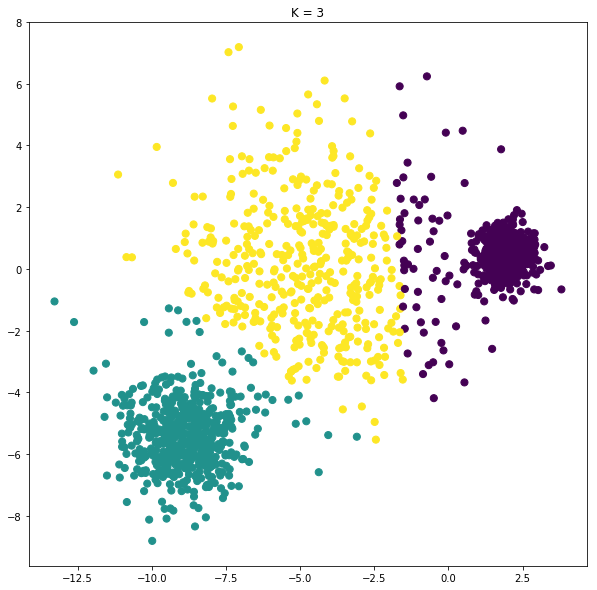

In [93]:
plt.figure(figsize=(10,10))
timeBefore = time.time()
kmeans = KMeans(n_clusters=3).fit(data)
y_kmeans = kmeans.predict(data)
timeAfter = time.time()
print(timeAfter-timeBefore, " seconds to run")
plt.title("K = 3")
plt.scatter(data['x'], data['y'], c=y_kmeans, s=50, cmap='viridis')

# K-Means Implementation

28 steps to complete
0.41655826568603516 seconds to run


<Figure size 1080x4320 with 0 Axes>

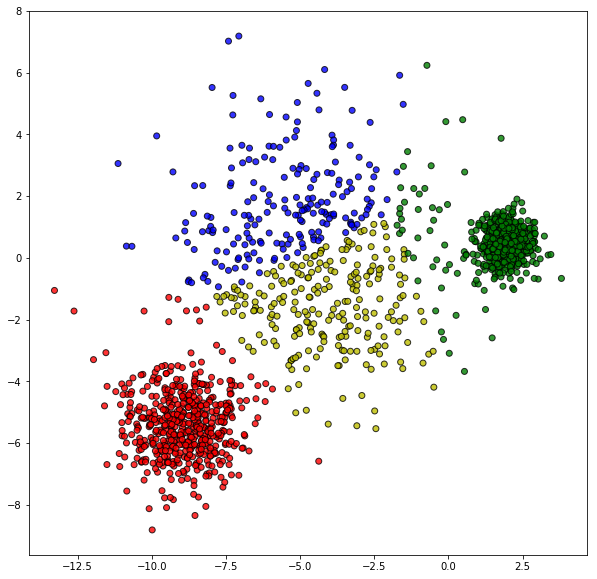

In [104]:
################################################
# update                                      
#   -This function updates centroid locations 
#  Params                                     
#    cen   - List of centroids to update    
#    df    - Dataframe of dataset
#    attr1 - First attribute being used
#    attr2 - Second attribute being used
#  Return
#    cen   - Updated list of centroids      
###############################################
def update(cen, df, attr1, attr2):
    for k in cen.keys():
        cen[k][0] = np.mean(df[df['closest'] == k][attr1])
        cen[k][1] = np.mean(df[df['closest'] == k][attr2])
    return cen

################################################
# assign                                      
#   -This function measures the distance and 
#    assigns every point to a cluster. It also
#    assigns color based on cluster for graph
#  Params                                     
#    centroids - List of centroids
#    df        - Dataframe of dataset
#    attr1     - First attribute being used
#    attr2     - Second attribute being used
#  Return
#    cen       - Updated dataframe      
###############################################
def assign(df, centroids, attr1, attr2):
    for i in centroids.keys():
        df['distanceFrom{}'.format(i)] = (np.sqrt((df[attr1] - centroids[i][0]) ** 2 + (df[attr2] - centroids[i][1]) ** 2))
    centroidDistanceCols = ['distanceFrom{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroidDistanceCols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distanceFrom')))
    df['color'] = df['closest'].map(lambda x: colormap[x])
    return df
  
################################################
# km                                      
#   -This function is the one that initializes
#    the k-means algorithm. 
#  Params                                     
#    numClusters - Number of clusters to look for    
#    data        - Dataframe of dataset
#    attr1       - First attribute being used
#    attr2       - Second attribute being used
#  Return
#    None      
###############################################
def km(numClusters, data, attr1, attr2):
    centroids = {}
    for i in range(numClusters):
        centroids[i] = [random.uniform(min(data[attr1]), max(data[attr1])), random.uniform(min(data[attr2]), max(data[attr2]))]
    
    fig = plt.figure(figsize=(15,60))
    df = assign(data, centroids, attr1, attr2)
        
    steps = 0
    while True:
        steps += 1
        ##Commented out section is to plot each iteration if desired
        #plt.subplot(15,3,steps)
        #plt.title(str(steps))
        #for i in centroids.keys():
        #    plt.scatter(*centroids[i], color=colormap[i], s=1220, marker='*')
        #plt.scatter(df[attr1], df[attr2], color=df['color'], alpha=1, edgecolor='k')
        closestCentroids = df['closest'].copy(deep=True)
        centroids = update(centroids, df, attr1, attr2)
        df = assign(df, centroids, attr1, attr2)
        if closestCentroids.equals(df['closest']):
            break
     
    print(steps, "steps to complete")
    fig = plt.figure(figsize=(10,10))
    plt.scatter(df[attr1], df[attr2], color=df['color'], alpha=.8, edgecolor='k')
    plt.show
timeBefore = time.time()    
km(4, data, 'x', 'y')
timeAfter = time.time()
impTime = timeAfter-timeBefore
print(impTime, "seconds to run")

# Crime Data Clustering

5 steps to complete
0.08291482925415039 seconds to run


<Figure size 1080x4320 with 0 Axes>

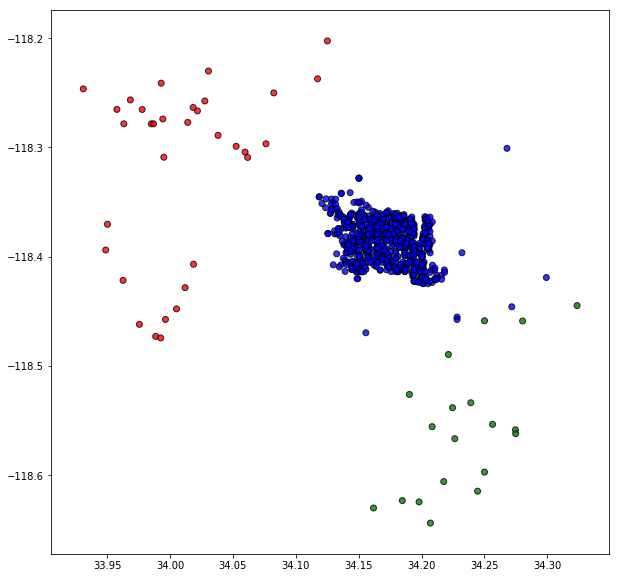

In [105]:
locations = pd.DataFrame()

for x in crimeData['Location ']:
    x = x.strip("(.)").split(',')
    x = [float(i) for i in x]
    locations = locations.append(pd.Series(x), ignore_index=True)
    
locations.columns = ['x', 'y']
timeBefore = time.time() 
km(3, locations, 'x', 'y')
timeAfter = time.time()
impTime = timeAfter-timeBefore
print(impTime, "seconds to run")